# Project Title: Sentiment Analysis on Tweets for Depression Prediction


This project focuses on sentiment analysis of tweets to predict depression using natural language processing (NLP) techniques. The dataset comprises tweets with labeled sentiments, making it ideal for sentiment analysis. The project involves data cleaning, text preprocessing, sentiment analysis, and model training using Logistic Regression. Tools used include Pandas, NumPy, Matplotlib, Seaborn, NLTK, Sklearn, and SMOTE. The model achieved robust performance metrics, demonstrating the effectiveness of NLP in identifying depression from social media data.

<b> Step One: Importing all necessary libraries.<b> 

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
import string


<b> Step Two: Loading CSV into pandas dataframe.<b>

In [229]:
df= pd.read_csv ('sentiment_tweets3.csv')

<b> Step Three: performing EDA (Exploratory Data Analysis) to understand our data, see if there's any missing values. To actually see the data types <b> 

In [230]:
#Viewing the first 5 rows of the our dataset
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


We can see that our dataset has URLs, capital letters, characters, punctuation and etc. This means we will have to clean our data. We can also see that the label (depression result) is Binary.

In [231]:
#Checking the data size
df.shape

(10314, 3)

The dataset has 10314 columns and 3 rows. 

In [232]:
#Viewing total number of NULL values.
df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

We can see that we do not have any null values and considering dropping  Index column as I won't be working with it. 

In [233]:
#Actually looking at the NULL values, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


<b> Step four: Data pre-processing, cleaning up the data to ensure that we can use it for model building. <b>

In [234]:
#Dropping the index column as it is not useful for sentiment analysis. 
df= df.drop(['Index'], axis=1)

In [235]:
#Removing any URL's
df['clean_tweets']= df['message to examine'].str.replace(r'https\S+', '', regex=True)

In [236]:
#Removing any HTML tags
df['clean_tweets']= df['message to examine'].str.replace(r'<.*?>', '', regex=True)

In [237]:
#Removing Non-alphabetic characters, punctuation and numbers 
df['clean_tweets'] = df['clean_tweets'].str.replace('[^a-zA-Z#]', ' ', regex=True)

In [238]:
#Lowercasing data
df['clean_tweets'] = df['clean_tweets'].str.lower()

In [239]:
#Using a string to re-iterate the adding of words that are greater than 2
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

In [240]:
df.head()

,message to examine,label (depression result),clean_tweets
0,just had a real good moment. i missssssssss hi...,0,just had real good moment missssssssss him much
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga http plurk com mzp
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com http www youtube...
3,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send accountant tomorrow oddly was...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace myspace com lookthunder


Viewing the dataset to ensure all the data above data cleaning is complete. We can see this in the new column named cleaned tweets. 

In [241]:
#Individual words for tokens 
tokenized_tweets= df['clean_tweets'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [just, had, real, good, moment, missssssssss, ...
1              [reading, manga, http, plurk, com, mzp]
2    [comeagainjen, http, twitpic, com, http, www, ...
3    [lapcat, need, send, accountant, tomorrow, odd...
4            [add, myspace, myspace, com, lookthunder]
Name: clean_tweets, dtype: object

In [242]:
#removing stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zizipontwembi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [243]:
#Stemming words
from nltk.stem.porter import PorterStemmer
stemmer= PorterStemmer()

In the above code we imported PorterStemmer which is used to removing endings in common english words. 

In [244]:
#Splitting tweets into individual words and applying stem to each function. 
tokenized_tweets=tokenized_tweets.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweets.head()

0    [just, had, real, good, moment, missssssssss, ...
1                 [read, manga, http, plurk, com, mzp]
2    [comeagainjen, http, twitpic, com, http, www, ...
3    [lapcat, need, send, account, tomorrow, oddli,...
4                [add, myspac, myspac, com, lookthund]
Name: clean_tweets, dtype: object

In [245]:
#Combining everything into sentences
for i in range (len(tokenized_tweets)):
    tokenized_tweets[i]= " ".join(tokenized_tweets[i])

In [246]:
#Updating the dataframe and Checking if it has been successfully updated
df['clean_tweets']= tokenized_tweets
df.head()

,message to examine,label (depression result),clean_tweets
0,just had a real good moment. i missssssssss hi...,0,just had real good moment missssssssss him much
1,is reading manga http://plurk.com/p/mzp1e,0,read manga http plurk com mzp
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com http www youtub ...
3,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send account tomorrow oddli wasn e...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspac myspac com lookthund


<b> Step Five: Data Visualization. Checking using wordcloud which words come up the most in tweets.<b>

In [247]:
#Only viewing words from Label (depression results)= 1. This should be the words that are associated with mental health issues, i.e depression.
words=" ".join([sentence for sentence in df['clean_tweets'][df['label (depression result)']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(words)


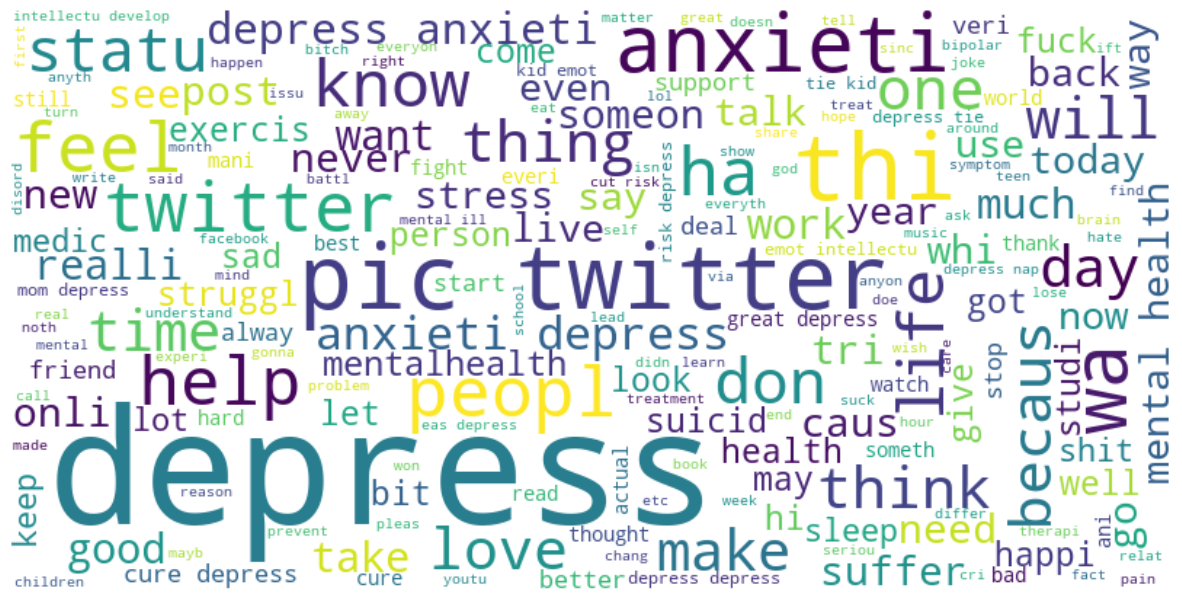

In [248]:
#plot the graph to visually see which words come up the most, the bigger the word, the more frequent it comes up (negative words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

We can see the most common negatuve words in the above wordcloud. 

In [249]:
#Most common words for opposite of depression (non-depressive) with the where label (depression result)= 0
words=" ".join([sentence for sentence in df['clean_tweets'][df['label (depression result)']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(words)


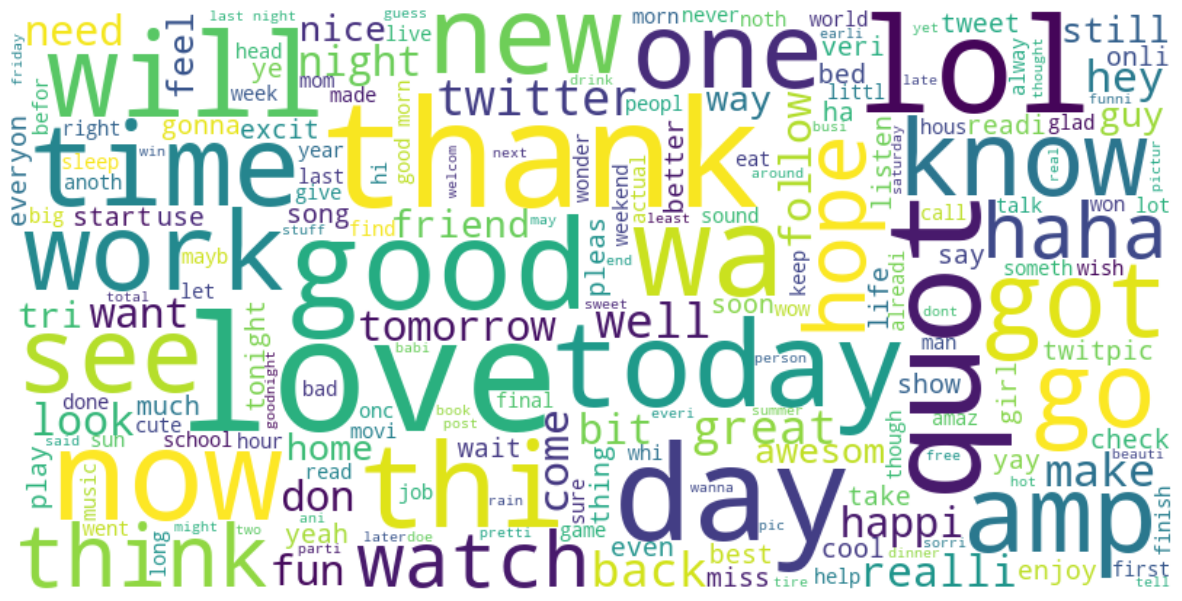

In [250]:
#plot the graph to visually see which words come up the most, the bigger the word, the more frequent it comes up (positive words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

We can see the most common positive words in the above wordcloud. 

In [251]:
#Checking if the dataset is balanced
df['label (depression result)'].value_counts()

label (depression result)
0    8000
1    2314
Name: count, dtype: int64

We can see that the dataset is imbalanced and there's more non-depressive (8000) results than depression (2314). 

(array([8000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

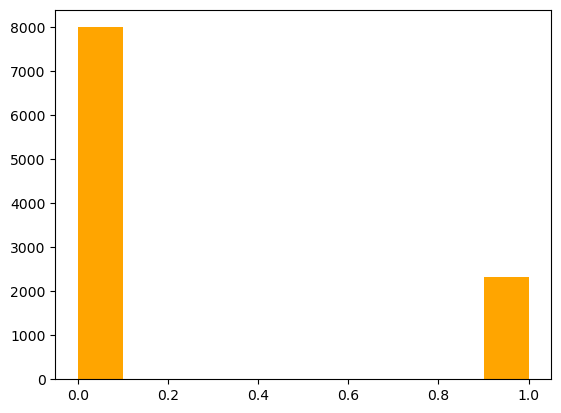

In [252]:
#Plotting a histogram to visualy see the imbalance in the target variable and making a mental note that we have to balance using SMOTE
plt.hist(df['label (depression result)'], color='Orange')

In [253]:
from textblob import TextBlob

In [254]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zizipontwembi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [255]:
#Importing and initalizing SentimentIntensityAnalyzer for sentimental compound scores. 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [256]:
#Creating functions for sentimental analysis
def get_vader_compound(text):
    return sia.polarity_scores(text)['compound']

def get_textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_textblob_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


For compound function, -1 will be negatuve; 0 will be neutral and 1 will be positive sentiment from tweets. 
For Polarirty, -1.0 will be negative, 0.0 will be neutral and 1.0 will be a positive sentiment.
For subjectivity, 0 will be oobjective and 1 subjective. 

In [257]:
df['compound'] = df['clean_tweets'].apply(get_vader_compound)
df['polarity'] = df['clean_tweets'].apply(get_textblob_polarity)
df['subjectivity'] = df['clean_tweets'].apply(get_textblob_subjectivity)

In [258]:
df.head()

,message to examine,label (depression result),clean_tweets,compound,polarity,subjectivity
0,just had a real good moment. i missssssssss hi...,0,just had real good moment missssssssss him much,0.4404,0.6,0.55
1,is reading manga http://plurk.com/p/mzp1e,0,read manga http plurk com mzp,0.0000,0.0,0.00
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com http www youtub ...,0.0000,0.0,0.00
3,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send account tomorrow oddli wasn e...,0.4019,0.0,0.00
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspac myspac com lookthund,0.0000,0.0,0.00


Viewing the first couple of rows to actually see calculations of compound, polarity and subjectivity. 

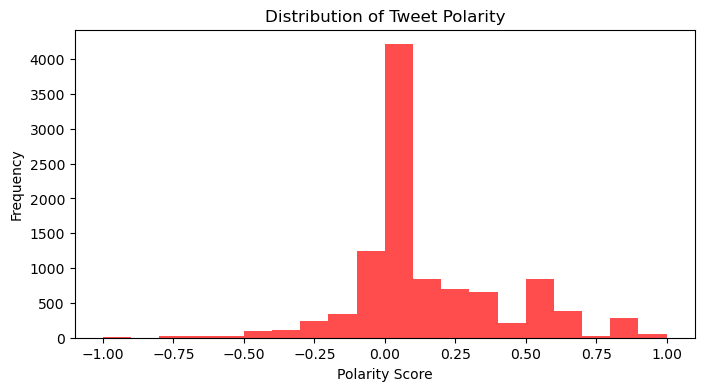

In [259]:
plt.figure(figsize=(8, 4))
plt.hist(df['polarity'], bins=20, color='Red', alpha=0.7)
plt.title('Distribution of Tweet Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

From the above distribution plot, we can see that there are more neutral sentiments in the tweets than negative and positive sentiments in the tweets and we can also see that there are more positive sentiments than negative.

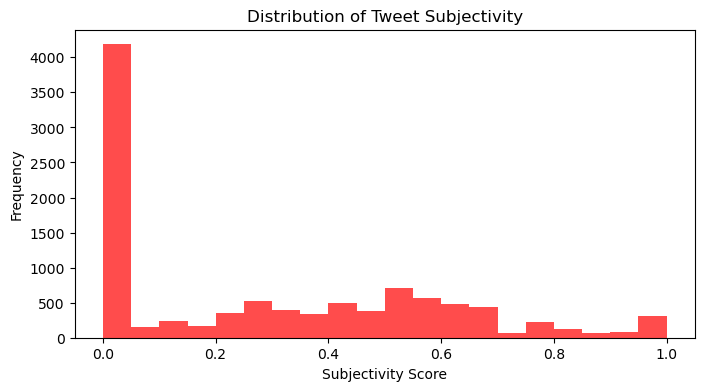

In [260]:
plt.figure(figsize=(8, 4))
plt.hist(df['subjectivity'], bins=20, color='Red', alpha=0.7)
plt.title('Distribution of Tweet Subjectivity')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.show()

This distribution plot confirms what was viewed in the previous one with more neutral senitments than negative and positive. 

<b> Step Six: Standardizing features and training pipeline model. <b> 

In [261]:
#defining X and Y variables to be used for model tarining 
X = df[['polarity', 'subjectivity', 'compound']]
y = df['label (depression result)']


In [262]:
from sklearn.model_selection import train_test_split

In [263]:
#Splitting the data and having a test size of 20% and training of 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [264]:
#Importing all necessary machine learning. Standard scaler to standardize data, SMOTE to balance the target and Machine learning model to be used= Logistic Regression 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline


In [265]:
#Setting up the pipeline while standardizng, balacing the dataset and we will use logistic regression 
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])


In [266]:
#fitting training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

In [267]:
#Predicting y variable using X_test. 
y_pred = pipeline.predict(X_test)

<b> Step Seven: Model Evaluation. <b>

In [268]:
#Importing all the necessary model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

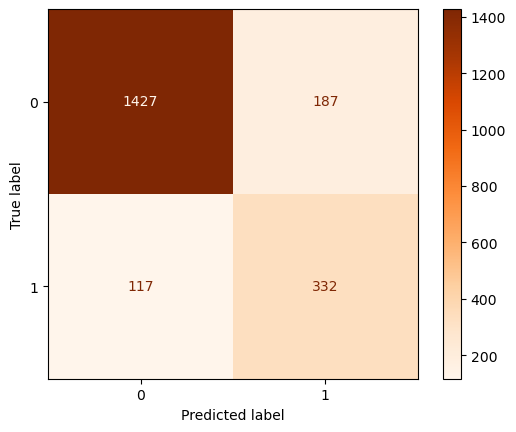

In [269]:
conf_matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot(cmap='Oranges')
plt.show()

The confusion matrix shows how the model performed by classifying the model's predictions into four:
1. True positives: The number of accurately predictived class 1 instances by the model (332)
2.  False Positive: The number of instances incorrectly predicted as class 1 (187)
3.  True Negative: The number of instances correctly predicted as class 0 (1427)
4.  False Negative: The number of instances incorrectly predicted as class 0 (117)

In [270]:
#Printing classification report
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1614
           1       0.64      0.74      0.69       449

    accuracy                           0.85      2063
   macro avg       0.78      0.81      0.79      2063
weighted avg       0.86      0.85      0.86      2063



In [271]:
from sklearn.metrics import roc_curve, roc_auc_score

In [272]:
auc= roc_auc_score(y_test, y_pred)
print(auc)

0.8117798605189006


The above accuracy score shows that the Logistic regression model correctly predicted 81,34% labels (depression results) for the testing data. The confusion matrix and classification reporter have greater details and visualization.

In [273]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred)

Text(0, 0.5, 'True Positive Rate(tpr)')

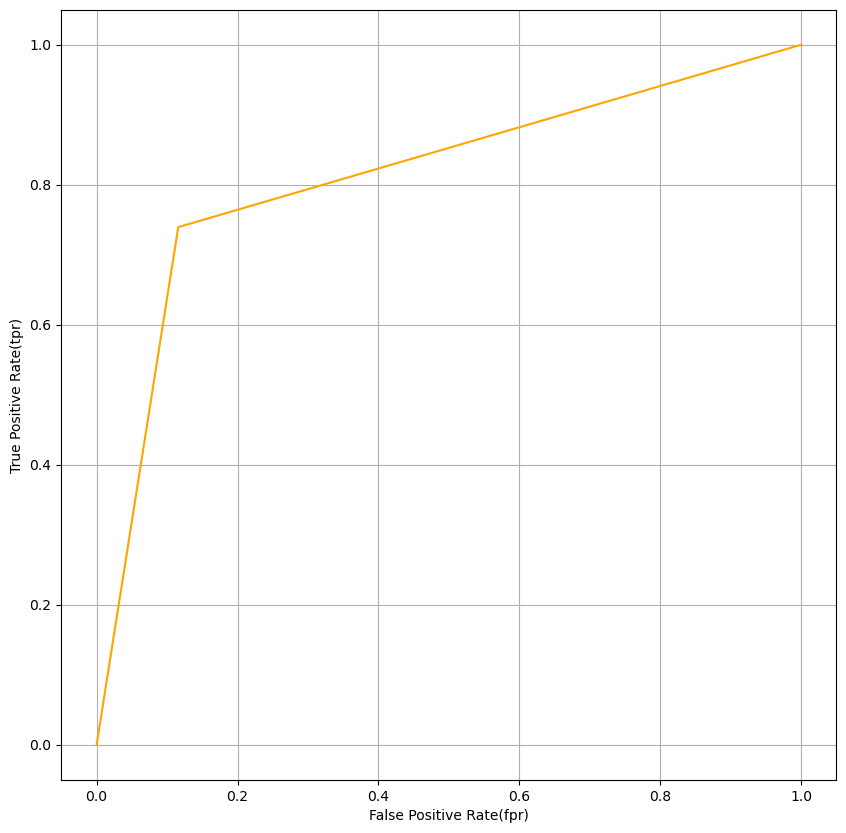

In [274]:
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='orange')
plt.grid(True)

plt.xlabel('False Positive Rate(fpr)')
plt.ylabel('True Positive Rate(tpr)')

The ROC curve shows that the model is able to effectively classify the positive labels without extremely mislabeling the negative label.

# Model evaluation:


The confusion matrix shows 1427 true negatives, the means that the model was able to correctly identify many 0 labels (no depression). The confusion matrix has 332 True positives showing that the model is able to identify a reasonable number of true positives. 187 false positives were evaluated in model performance, which is relatively high. The model showed 117 false negatives.


Classification report:
The model had 92% precision for label 0, this means that the model was able to accurately predict label 0. For label 1, the model had 64% precision which means that a high number of predicted depression (label 1) was predicted incorrectly. 
For recall the model predicted Label 0 as 88% this shows that the model only missed 12% of non-depressive tweets. For Label 1, recall is 74% this shows that the model misses 26% of depression tweets and overall, the model is performing fairly well.
The F1-score for label 0 is 90% and shows that the model is able to predict no-depression well. The F1-score for label 1 is 69% and shows that the model is fairly low when it comes to predicting depression.


ROC curve:
The ROC curve shows that the model is able to differentiate between depression and no depression. The AUC is 81,35% which shows that the model is good at differentiating the two labels.

The model could have been improved through other feature engineering techniques, possible model optimization and revisiting the pipeline used for the algorithms. 
